<a href="https://colab.research.google.com/github/Abubakar26/CNN-Fyp/blob/master/cnnp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1
ytest 0
Xtrain (5576, 90, 90, 3)
Ytrain (5576,)
Ytest (1394,)
Xtest (1394, 90, 90, 3)


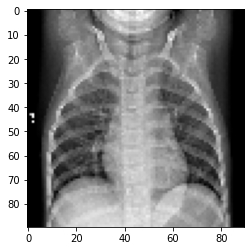

Train on 4460 samples, validate on 1116 samples
Epoch 1/30
4460/4460 [==============================] - 3s 657us/step - loss: 0.2970 - acc: 0.8763 - val_loss: 0.4561 - val_acc: 0.8519
Epoch 2/30
4460/4460 [==============================] - 1s 312us/step - loss: 0.1790 - acc: 0.9319 - val_loss: 1.2630 - val_acc: 0.5427
Epoch 3/30
4460/4460 [==============================] - 1s 316us/step - loss: 0.1544 - acc: 0.9401 - val_loss: 3.4942 - val_acc: 0.7820
Epoch 4/30
4460/4460 [==============================] - 1s 314us/step - loss: 0.1476 - acc: 0.9447 - val_loss: 0.2468 - val_acc: 0.9017
Epoch 5/30
4460/4460 [==============================] - 1s 314us/step - loss: 0.1282 - acc: 0.9521 - val_loss: 0.2218 - val_acc: 0.9038
Epoch 6/30
4460/4460 [==============================] - 1s 312us/step - loss: 0.1172 - acc: 0.9550 - val_loss: 0.3645 - val_acc: 0.8563
Epoch 7/30
4460/4460 [==============================] - 1s 307us/step - loss: 0.1101 - acc: 0.9572 - val_loss: 0.8394 - val_acc: 0.7948


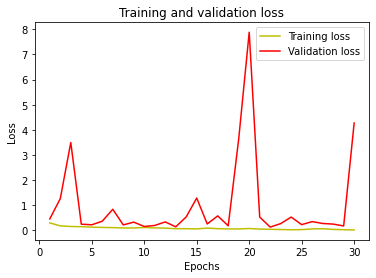

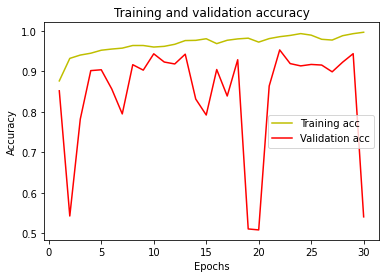

Test loss: [4.318746087198791, 0.5418460272477039]
Test accuracy: [4.318746087198791, 0.5418460272477039]
prediction [[1.0000000e+00 4.6525532e-08 1.6491852e-13]
 [1.0000000e+00 1.1892687e-10 1.3496950e-12]
 [1.0000000e+00 3.6843248e-10 1.1572133e-12]
 ...
 [9.9999797e-01 2.0314569e-06 3.6729806e-09]
 [2.8381174e-02 9.7161883e-01 3.4262624e-11]
 [9.9984086e-01 1.5914558e-04 6.6055370e-11]]
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 86, 86, 128)       9728      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 21, 21, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 18, 18, 64)        131136    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 64)          0 

In [10]:
from google.colab import drive 
drive.mount('/content/drive')
DATA_PATH = "/content/drive/My Drive/Colab Notebooks"
import pickle as pk
from matplotlib import pyplot as plt
from sklearn.utils import shuffle
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import keras 
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dense,Dropout,Flatten,BatchNormalization
from sklearn.model_selection import train_test_split as tts
import matplotlib.pyplot as plt
import pandas as pd
from keras.optimizers import SGD
batch_size = 128
num_classes = 3
epochs = 30
import os
pickle_in1=open(DATA_PATH+"/colorxray","rb")
X=pk.load(pickle_in1)
pickle_in2=open(DATA_PATH+"/colorlabels","rb")
Y=pk.load(pickle_in2)
# X,Y=shuffle(X,Y)
print(Y[6575])
x_train,x_test,y_train,y_test = tts(X,Y,train_size=0.8)
# convert class vectors to binary class matrices
x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)
Y_test=y_test
print("ytest",Y_test[0])
print("Xtrain",x_train.shape)
print("Ytrain",y_train.shape)
print("Ytest",y_test.shape)
print("Xtest",x_test.shape)
plt.imshow(x_train[200])
plt.show()
opt=SGD(lr=0.01)
y_train = keras.utils.to_categorical(y_train,3)
y_test = keras.utils.to_categorical(y_test,3)
# print(X_train.shape)
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
model = Sequential()
model.add(Conv2D(128, kernel_size=(5, 5),activation='relu', input_shape=(90,90,3)))
model.add(MaxPooling2D(pool_size=(4,4)))
model.add(Conv2D(64, (4, 4), activation='relu'))
model.add(MaxPooling2D(pool_size=(4,4)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Flatten())
model.add(BatchNormalization(momentum=0.1))
model.add(Dense(1028,activation='relu'))
#model.add(Dense(1032,activation='softmax'))
# model.add(GlobalAveragePooling2D())
model.add(Dropout(0.01))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.binary_crossentropy,optimizer=keras.optimizers.Adadelta(lr=0.3),metrics=['accuracy'])
model.get_weights()
history=model.fit(x_train,y_train, batch_size=batch_size, epochs=epochs,verbose=1,shuffle=True ,validation_split=0.2 )
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report as cr
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
score = model.evaluate(x_test, y_test, verbose=0)
pd=model.predict(x_test, batch_size=None, verbose=0, steps=None, callbacks=[early_stopping], max_queue_size=10, workers=1, use_multiprocessing=False)
print('Test loss:', score)
print('Test accuracy:', score)
print("prediction",pd)
print(model.summary())
store=model.save('cnnp1')
import pickle as pk
# pk.dump(model,open(filename,'wb')) 
model_save_name = 'cnnpkl'
pk.dump(model,open(DATA_PATH+'/'+model_save_name,'wb'))
# path = (DATA_PATH+"/"+model_save_name) 
# model.save(path)


In [9]:
import pickle as pk
from google.colab import drive 
drive.mount('/content/drive')
DATA_PATH = "/content/drive/My Drive/Colab Notebooks"
model=pk.load(open(DATA_PATH+'/cnnpkl','rb'))
import cv2
cat=['Normal','Pneumonia','TB']
img=cv2.imread(DATA_PATH+'/CHNCXR_0354_1.png')
img=cv2.resize(img,(90,90))
import numpy
img=numpy.reshape(img,(-1,90,90,3))
pred=model.predict(img)
print (str(cat[int(pred[0][0])]))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Normal
